# Importing the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib 

# Load and Preprocess the Images

In [2]:
path = os.listdir('brain_tumor_data/Training/')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [3]:
X = []
Y = []
for cls in classes:
    path_training = 'brain_tumor_data/Training/' + cls
    for j in os.listdir(path_training):
        image = cv2.imread(path_training + '/' + j, 0)  # Read image in grayscale
        image = cv2.resize(image, (200, 200))  # Resize image to 200x200
        X.append(image)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

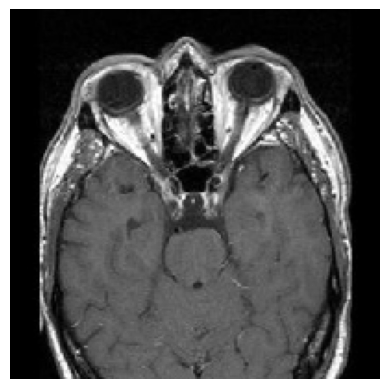

(1222, 200, 200)


In [5]:
# Display the first image and its shape
plt.imshow(X[0], cmap='gray')
plt.axis('off')
plt.show()
print(X.shape)  # (number of images, height, width)

In [6]:
# Reshape X to 2D array
X_updated = X.reshape(len(X), -1)  # Flatten each image
print(X_updated.shape)  # (number of images, 200*200)

(1222, 40000)


# Split the Dataset into Train and Test Sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, random_state=10, test_size=0.20)
print(x_train.shape, x_test.shape)

(977, 40000) (245, 40000)


# Feature scaling

In [8]:
x_train = x_train / 255  # Scale pixel values to [0, 1]
x_test = x_test / 255

# Train Logistic Regression Model

In [14]:
regression = LogisticRegression(C=0.1)
regression.fit(x_train, y_train)
import warnings
warnings.filterwarnings('ignore')

# Train Support Vector Machine Model

In [15]:
support_vector = SVC()
support_vector.fit(x_train, y_train)
import warnings
warnings.filterwarnings('ignore')

# Evaluate Logistic Regression Model

In [11]:
print("Logistic Regression Training Score:", regression.score(x_train, y_train))
print("Logistic Regression Testing Score:", regression.score(x_test, y_test))

Logistic Regression Training Score: 1.0
Logistic Regression Testing Score: 0.9591836734693877


# Evaluate Support Vector Machine Model

In [12]:
print("SVM Training Score:", support_vector.score(x_train, y_train))
print("SVM Testing Score:", support_vector.score(x_test, y_test))

SVM Training Score: 0.9938587512794268
SVM Testing Score: 0.963265306122449


# Save the Trained Models

In [18]:
joblib.dump(regression, 'logistic_regression_model.pkl')  # Save Logistic Regression model

['logistic_regression_model.pkl']

In [19]:
joblib.dump(support_vector, 'svm_model.pkl')  # Save SVM model

['svm_model.pkl']

# Prediction Dictionary

In [17]:
dict = {0: 'No Tumor', 1: 'Positive Tumor'}

# Visualize Predictions on Test Images for 'no_tumor' Class

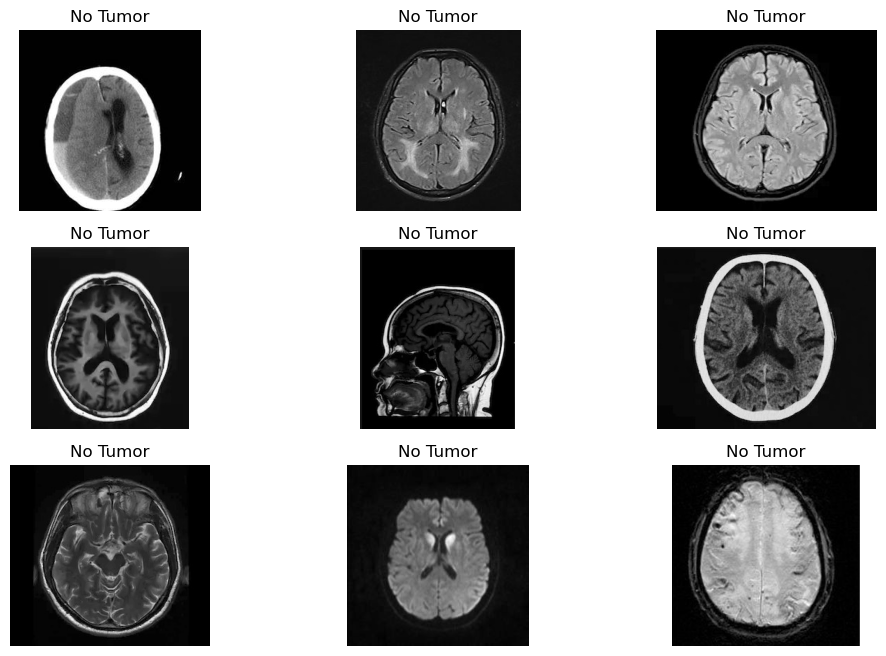

In [20]:
plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir('brain_tumor_data/Testing/no_tumor/')[:9]:
    plt.subplot(3, 3, c)
    image = cv2.imread('brain_tumor_data/Testing/no_tumor/' + i, 0)
    image1 = cv2.resize(image, (200, 200))
    image1 = image1.reshape(1, -1) / 255
    p = support_vector.predict(image1)
    plt.title(dict[p[0]])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()


# Visualize Predictions on Test Images for 'tumor' Class

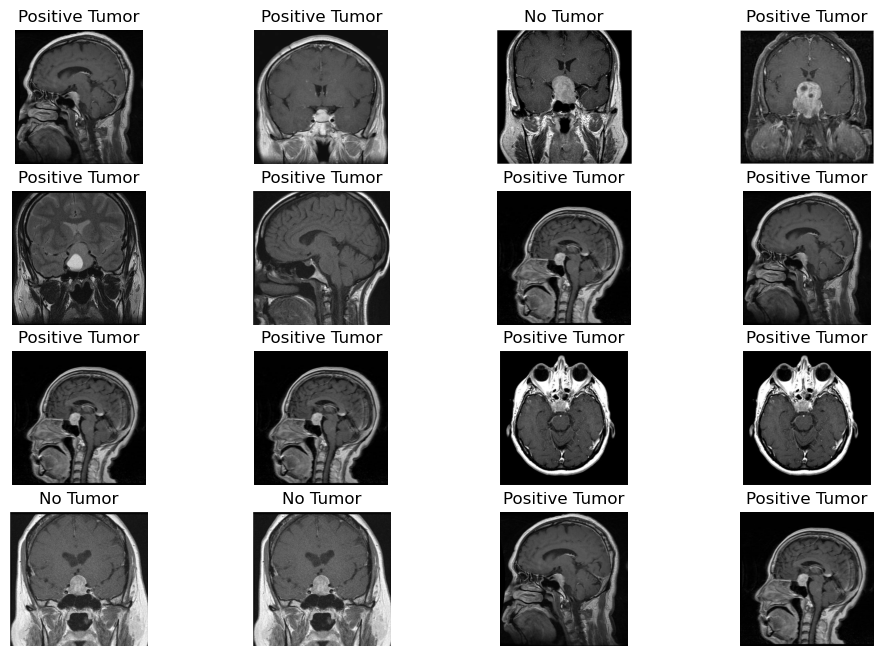

In [21]:
plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir('brain_tumor_data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4, 4, c)
    image = cv2.imread('brain_tumor_data/Testing/pituitary_tumor/' + i, 0)
    image1 = cv2.resize(image, (200, 200))
    image1 = image1.reshape(1, -1) / 255
    p = support_vector.predict(image1)
    plt.title(dict[p[0]])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()